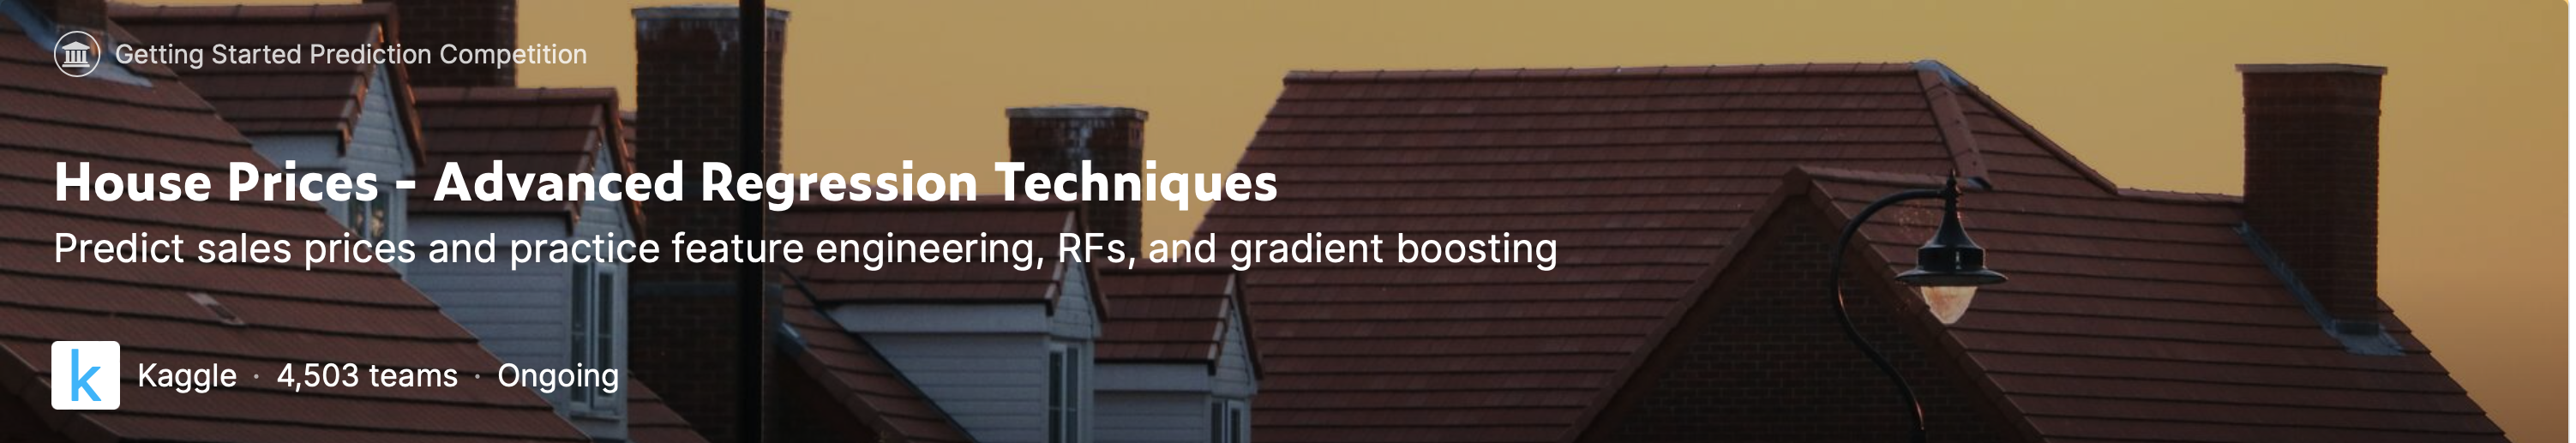

# Introduction

**Link to Competition:** [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

**About This Project:** Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. 

**Goal:** To predict the sales price for each house.

**Evaluation Metrics:** Submissions will be evaluated on `Root-Mean-Squared-Error (RMSE)` between the logarithm of the predicted value and the logarithm of the observed sales price. 

# Importing Data

In [ ]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from numpy import arange
from scipy.stats.stats import pearsonr
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/Learning ML/House Prices - Kaggle/train.csv', index_col=False)
test = pd.read_csv('/content/gdrive/MyDrive/Learning ML/House Prices - Kaggle/test.csv', index_col=False)

In [ ]:
d = {'Feature' : ['SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
                  'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrType', 'ExterQual', 'ExterCond',
                  'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 
                  'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                  'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], 
     'Description' : ['the property\'s sale price in dollars. This is the target variable that you\'re trying to predict.', 
                      'The building class', 
                      'The general zoning classification', 
                      'Linear feet of street connected to property', 
                      'Lot size in square feet', 
                      'Type of road access', 
                      'Type of alley access', 
                      'General shape of property', 
                      'Flatness of the property', 
                      'Type of utilities available', 
                      'Lot configuration', 
                      'Slope of property', 
                      'Physical locations within Ames city limits', 
                      'Proximity to main road or railroad',
                      'Proximity to main road or railroad (if a second is present)',
                      'Type of dwelling',
                      'Style of dwelling',
                      'Overall material and finish quality', 
                      'Overall condition rating', 
                      'Original construction date', 
                      'Remodel date',
                      'Type of roof', 
                      'Roof material', 
                      'Exterior covering on house', 
                      'Exterior covering on house (if more than one material)', 
                      'Masonry veneer type', 
                      'Masonry veneer area in square feet', 
                      'Exterior material quality', 
                      'Present condition of the material on the exterior', 
                      'Type of foundation', 
                      'Height of the basement', 
                      'General condition of the basement', 
                      'Walkout or garden level basement walls', 
                      'Quality of basement finished area', 
                      'Type 1 finished square feet', 
                      'Quality of second finished area (if present)', 
                      'Type 2 finished square feet', 
                      'Unfinished square feet of basement area', 
                      'Total square feet of basement area', 
                      'Type of heating', 
                      'Heating quality and condition',
                      'Central air conditioning', 
                      'Electrical system',
                      'First Floor square feet', 
                      'Second floor square feet', 
                      'Low quality finished square feet (all floors)',
                      'Above grade (ground) living area square feet', 
                      'Basement full bathrooms', 
                      'Basement half bathrooms', 
                      'Full bathrooms above grade', 
                      'Half baths above grade', 
                      'Number of bedrooms above basement level', 
                      'Number of kitchens', 
                      'Kitchen quality',
                      'Total rooms above grade (does not include bathrooms)', 
                      'Home functionality rating', 
                      'Number of fireplaces', 
                      'Fireplace quality', 
                      'Garage location', 
                      'Year garage was built', 
                      'Interior finish of the garage', 
                      'Size of garage in car capacity', 
                      'Size of garage in square feet', 
                      'Garage quality', 
                      'Garage condition', 
                      'Paved driveway', 
                      'Wood deck area in square feet', 
                      'Open porch area in square feet', 
                      'Enclosed porch area in square feet',
                      'Three season porch area in square feet', 
                      'Screen porch area in square feet', 
                      'Pool area in square feet', 
                      'Pool quality', 
                      'Fence quality', 
                      'Miscellaneous feature not covered in other categories', 
                      '$Value of miscellaneous feature', 
                      'Month Sold', 
                      'Year Sold', 
                      'Type of sale', 
                      'Condition of sale']}



features = pd.DataFrame(data=d)
features.sort_values(by='Feature', ascending=True, inplace=True)
features.set_index('Feature', inplace=True)

In [ ]:
features

,Description
Feature,
1stFlrSF,First Floor square feet
2ndFlrSF,Second floor square feet
3SsnPorch,Three season porch area in square feet
Alley,Type of alley access
Bedroom,Number of bedrooms above basement level
BldgType,Type of dwelling
BsmtCond,General condition of the basement
BsmtExposure,Walkout or garden level basement walls
BsmtFinSF1,Type 1 finished square feet


# Preparing Data For Modeling

## Percent of Missing Values


In [ ]:
null_counts = train.isna().sum()
columns_with_nulls = (null_counts[null_counts > 0] / len(train)).round(2)

columns_with_nulls.sort_values(ascending=False)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
BsmtCond        0.03
BsmtQual        0.03
MasVnrArea      0.01
MasVnrType      0.01
Electrical      0.00
dtype: float64

`PoolQC`, `MiscFeature`, `Alley`, are very close to being 100% null. Trying to fill in these features would likely make modeling predictions less accurate. Let's drop these columns. 

`Fence` is around 80% empty. No point in filling it. However, we could create another features called `Fence_is_missing` that is a binary variable that indicates whether the column has a value or not. We don't want to lose the prediction power. 

`FireplaceQu` is close to 50% empty. Also no point in filling it in. However, we could create another feature called `FireplaceQu_is_missing` as a binary variable.

For all the other features in the list above, we will keep them but impute the na values with either the most commmon value (if it's categorical) and median value (if it's numeric). Please note we will impute at the neighborhood level (since this is real estate data where location is very important). 

In [ ]:
# drop those columns that have more than 90% null values 
columns_to_drop = columns_with_nulls[columns_with_nulls > 0.90].index

train.drop(columns=columns_to_drop, inplace=True)
test.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# create fireplacequ_is_missing 
train['FireplaceQu_is_missing'] = train['FireplaceQu'].isnull().astype(int)
test['FireplaceQu_is_missing'] = test['FireplaceQu'].isnull().astype(int)

# create fence_is_missing
train['Fence_is_missing'] = train['Fence'].isnull().astype(int)
test['Fence_is_missing'] = test['Fence'].isnull().astype(int)

# drop fireplacequ
train.drop(['FireplaceQu', 'Fence'], axis=1, inplace=True)
test.drop(['FireplaceQu', 'Fence'], axis=1, inplace=True)

In [ ]:
# fill those columns where 90% of the values belong to one value
train['GarageQual'].fillna('TA', inplace=True)
train['GarageCond'].fillna('TA', inplace=True)
train['BsmtFinType2'].fillna('Unf', inplace=True)
train['BsmtCond'].fillna('TA', inplace=True)
train['Electrical'].fillna('SBrkr', inplace=True)

test['GarageQual'].fillna('TA', inplace=True)
test['GarageCond'].fillna('TA', inplace=True)
test['BsmtFinType2'].fillna('Unf', inplace=True)
test['BsmtCond'].fillna('TA', inplace=True)
test['Electrical'].fillna('SBrkr', inplace=True)

In [ ]:
# calculate the median LotFrontage, GarageYrBlt, and MasVnrArea for each neighborhood
LotFrontage_by_neighborhood = train.groupby('Neighborhood')['LotFrontage'].median()
GarageYrBlt_by_neighborhood = train.groupby('Neighborhood')['GarageYrBlt'].median()
MasVnrArea_by_neighborhood = train.groupby('Neighborhood')['MasVnrArea'].median()

# calculate the mode for the remaining categorical variables 
GarageType_by_neighborhood = train.groupby('Neighborhood')['GarageType'].apply(lambda x: x.mode()[0])
GarageFinish_by_neighborhood = train.groupby('Neighborhood')['GarageFinish'].apply(lambda x: x.mode()[0])
BsmtExposure_by_neighborhood = train.groupby('Neighborhood')['BsmtExposure'].apply(lambda x: x.mode()[0])
BsmtQual_by_neighborhood = train.groupby('Neighborhood')['BsmtQual'].apply(lambda x: x.mode()[0])
BsmtFinType1_by_neighborhood = train.groupby('Neighborhood')['BsmtFinType1'].apply(lambda x: x.mode()[0])
MasVnrType_by_neighborhood = train.groupby('Neighborhood')['MasVnrType'].apply(lambda x: x.mode()[0])

In [ ]:
# impute variables with medians and modes calculated above
neighborhoods = train['Neighborhood'].unique()

def imputing_features(df):
  frames = []
  for n in neighborhoods:
    temp_df = df[df['Neighborhood'] == n].copy()
    temp_df['LotFrontage'].fillna(LotFrontage_by_neighborhood.loc[n], inplace=True)
    temp_df['GarageYrBlt'].fillna(GarageYrBlt_by_neighborhood.loc[n], inplace=True)
    temp_df['MasVnrArea'].fillna(MasVnrArea_by_neighborhood.loc[n], inplace=True)
    temp_df['GarageType'].fillna(GarageType_by_neighborhood.loc[n], inplace=True)
    temp_df['GarageFinish'].fillna(GarageFinish_by_neighborhood.loc[n], inplace=True)
    temp_df['BsmtExposure'].fillna(BsmtExposure_by_neighborhood.loc[n], inplace=True)
    temp_df['BsmtQual'].fillna(BsmtQual_by_neighborhood.loc[n], inplace=True)
    temp_df['BsmtFinType1'].fillna(BsmtFinType1_by_neighborhood.loc[n], inplace=True)
    temp_df['MasVnrType'].fillna(MasVnrType_by_neighborhood.loc[n], inplace=True)
    frames.append(temp_df)
    
  final_df = pd.concat(frames)
  return final_df
  

train = imputing_features(train)
test = imputing_features(test)

In [ ]:
# seeing if all the na values in the test set are taking care
test_nulls = test.isnull().sum()

test_nulls[test_nulls > 0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [ ]:
test[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']].describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MSZoning,1455,5,RL,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1457,1,AllPub,1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exterior1st,1458,13,VinylSd,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exterior2nd,1458,15,VinylSd,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,1458.0,NaN,NaN,NaN,439.203704,455.268042,0.0,0.0,350.5,753.5,4010.0
BsmtFinSF2,1458.0,NaN,NaN,NaN,52.619342,176.753926,0.0,0.0,0.0,0.0,1526.0
BsmtUnfSF,1458.0,NaN,NaN,NaN,554.294925,437.260486,0.0,219.25,460.0,797.75,2140.0
TotalBsmtSF,1458.0,NaN,NaN,NaN,1046.11797,442.898624,0.0,784.0,988.0,1305.0,5095.0
BsmtFullBath,1457.0,NaN,NaN,NaN,0.434454,0.530648,0.0,0.0,0.0,1.0,3.0
BsmtHalfBath,1457.0,NaN,NaN,NaN,0.065202,0.252468,0.0,0.0,0.0,0.0,2.0


In [ ]:
# the test set has several nulls. Going to take care of them here
test['MSZoning'].fillna('RL', inplace=True)
test['Utilities'].fillna('AllPub', inplace=True)
test['Exterior1st'].fillna('VinylSd', inplace=True)
test['Exterior2nd'].fillna('VinylSd', inplace=True)
test['BsmtFinSF1'].fillna(train['BsmtFinSF1'].median(), inplace=True)
test['BsmtFinSF2'].fillna(train['BsmtFinSF2'].median(), inplace=True)
test['BsmtUnfSF'].fillna(train['BsmtUnfSF'].median(), inplace=True)
test['TotalBsmtSF'].fillna(train['TotalBsmtSF'].median(), inplace=True)
test['BsmtFullBath'].fillna(train['BsmtFullBath'].median(), inplace=True)
test['BsmtHalfBath'].fillna(train['BsmtHalfBath'].median(), inplace=True)
test['KitchenQual'].fillna('TA', inplace=True)
test['Functional'].fillna('Typ', inplace=True)
test['GarageCars'].fillna(train['GarageCars'].median(), inplace=True)
test['GarageArea'].fillna(train['GarageArea'].median(), inplace=True)
test['SaleType'].fillna('WD', inplace=True)

In [ ]:
train_nulls_sum = train.isnull().sum().sum()
test_nulls_sum = test.isnull().sum().sum()

print('Number of nulls in training set: {}'.format(train_nulls_sum))
print('Number of nulls in testing set: {}'.format(test_nulls_sum))

Number of nulls in training set: 0
Number of nulls in testing set: 0


## Amount of Variation

There are some categorical columns that are close to 100% the same value. These features offer no prediction power, and they make modeling slower. 

Let's set the threshold to 95% and drop those columns that are over it. 

In [ ]:
freq_of_top_value = train.describe(include='object').transpose()[['top', 'freq', 'unique', 'count']]
freq_of_top_value['freq pct'] = (freq_of_top_value['freq'] / 1460)
freq_of_top_value.sort_values(by='freq pct', ascending=False)

,top,freq,unique,count,freq pct
Utilities,AllPub,1459,2,1460,0.999315
Street,Pave,1454,2,1460,0.99589
Condition2,Norm,1445,8,1460,0.989726
RoofMatl,CompShg,1434,8,1460,0.982192
Heating,GasA,1428,6,1460,0.978082
GarageCond,TA,1407,5,1460,0.963699
GarageQual,TA,1392,5,1460,0.953425
LandSlope,Gtl,1382,3,1460,0.946575
CentralAir,Y,1365,2,1460,0.934932
Functional,Typ,1360,7,1460,0.931507


In [ ]:
# drop those categorical columns that have more than 95% the same value
more_than_95pct_same_value = freq_of_top_value[freq_of_top_value['freq pct'] > 0.95].index
train.drop(columns=more_than_95pct_same_value, inplace=True)
test.drop(columns=more_than_95pct_same_value, inplace=True)

## Pairwise Correlation

Many variables are often correlated with each other, and hence are redundant. 

If two variables are highly correlated, keeping only one will help reduce dimensionality without lossing much information. 
  - Which variables to keep? The one that has a higher correlation coefficient with the target. 

In [ ]:
# with the following function we can select highly correlated features

def correlation(data, threshold):
  col_corr = set()  # set of all the names of correlated columns
  columns_for_corr = data.drop(columns=['Id']).columns
  corr_matrix = data[columns_for_corr].corr().abs()
  
  for i in range(corr_matrix.shape[1]):
    for j in range(i):
      if (corr_matrix.iloc[i, j]) > threshold:  
        colname = corr_matrix.columns[i]   # getting the name of the column
        col_corr.add(colname)

  return col_corr

In [ ]:
corr_features = correlation(train, 0.70)

corr_features

{'1stFlrSF',
 'FireplaceQu_is_missing',
 'GarageArea',
 'GarageYrBlt',
 'SalePrice',
 'TotRmsAbvGrd'}

In [ ]:
corr_matrix = train.drop('Id', axis=1).corr().abs().round(2)

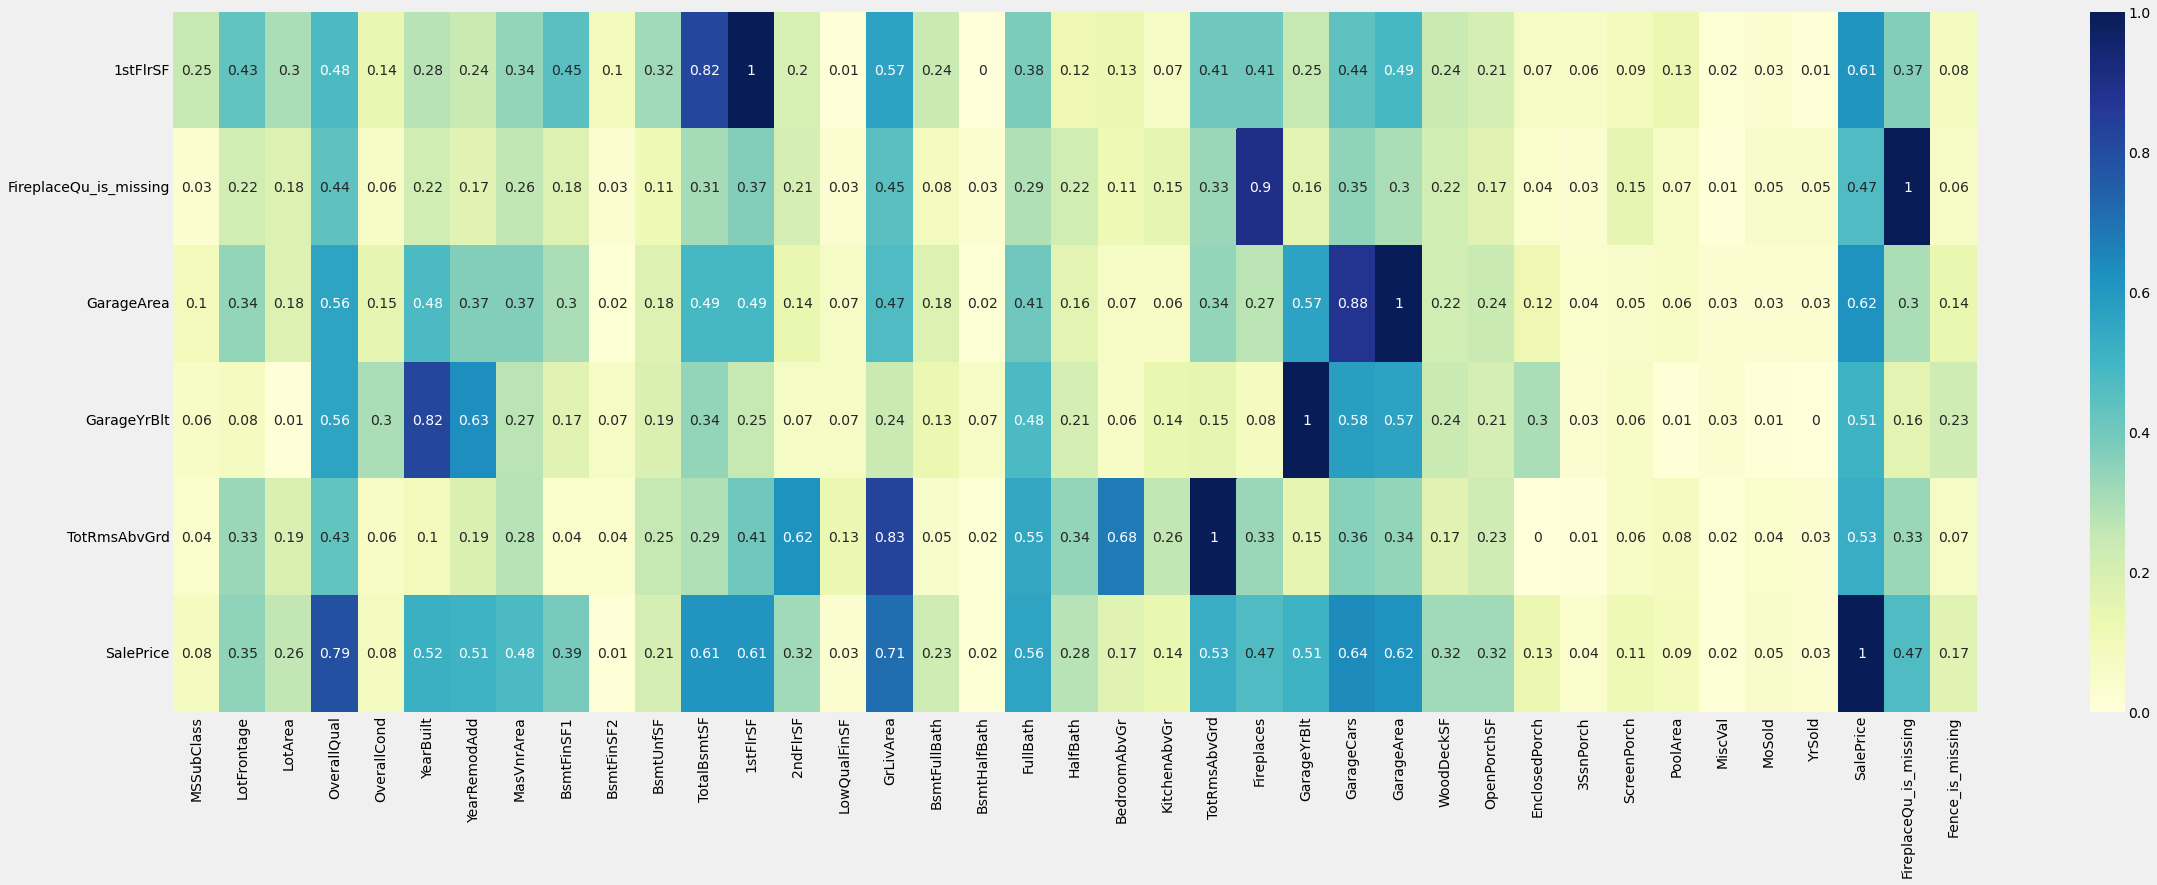

In [ ]:
x = corr_matrix[['1stFlrSF', 'FireplaceQu_is_missing', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd', 'SalePrice']].transpose()
plt.figure(figsize=(36,12))
sns.heatmap(x, annot=True, cmap='YlGnBu');

In [ ]:
corr_matrix['SalePrice'].sort_index()

1stFlrSF                  0.61
2ndFlrSF                  0.32
3SsnPorch                 0.04
BedroomAbvGr              0.17
BsmtFinSF1                0.39
BsmtFinSF2                0.01
BsmtFullBath              0.23
BsmtHalfBath              0.02
BsmtUnfSF                 0.21
EnclosedPorch             0.13
Fence_is_missing          0.17
FireplaceQu_is_missing    0.47
Fireplaces                0.47
FullBath                  0.56
GarageArea                0.62
GarageCars                0.64
GarageYrBlt               0.51
GrLivArea                 0.71
HalfBath                  0.28
KitchenAbvGr              0.14
LotArea                   0.26
LotFrontage               0.35
LowQualFinSF              0.03
MSSubClass                0.08
MasVnrArea                0.48
MiscVal                   0.02
MoSold                    0.05
OpenPorchSF               0.32
OverallCond               0.08
OverallQual               0.79
PoolArea                  0.09
SalePrice                 1.00
ScreenPo

Features that correlate highly with one another:
- `1stFlrSF` and `TotalBsmtSF` (correlation: 0.82)
- `FireplaceQu_is_missing` and `Fireplaces` (correlation: 0.90)
- `GarageArea` and `GarageCars` (correlation: 0.88)
- `GarageYrBlt` and `YearBuilt` (correlation: 0.82)
- `TotRmsAbvGrd` and `GrLivArea` (correlation: 0.83)

Let's drop the following:
- `TotalBsmtSF`
- `FireplaceQu_is_missing`
- `GarageArea`
- `GarageYrBlt`
- `TotRmsAbvGrd`


In [ ]:
columns_to_drop = ['TotalBsmtSF', 'FireplaceQu_is_missing', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd']
train.drop(columns=columns_to_drop, inplace=True)
test.drop(columns=columns_to_drop, inplace=True)

In [ ]:
features

,Description
Feature,
1stFlrSF,First Floor square feet
2ndFlrSF,Second floor square feet
3SsnPorch,Three season porch area in square feet
Alley,Type of alley access
Bedroom,Number of bedrooms above basement level
BldgType,Type of dwelling
BsmtCond,General condition of the basement
BsmtExposure,Walkout or garden level basement walls
BsmtFinSF1,Type 1 finished square feet


## Feature Engineering

Let's see what other features we can add to our data in order to increase prediction power. Add the following features. 

- **YrsSinceRemodelBuckets:** The number of years since the house was remodeled into different buckets. I'm guessing that those houses that have been remodeled recently are sold for more than those who have never had a remodel or whose remodel was a long time ago. 

- **SeasonSold:** Take the month the house was sold, and provide the season that it sold. I know that houses sell less during the winter months than during the summer since people hate moving in the cold weather.  

- **MoreThanOneExterior:** We have information on `Exterior1st` and `Exterior2nd`. If `Exterior2nd` isn't different, it defaults to `Exterior1st` which makes us have redundant data. (I have already checked and 1245/1460 have the same value for exterior1st and exterior2nd). With that being said, I'm going to keep `Exterior1st` but create a binary variable which denotes whether there are more than 1 exterior. 

- **QualityAndCondition:** We know that the `OverallQual` and `OverallCond` features are very important. Therefore, let's combine both features together. 

- **Cluster:** Kmeans is an unsupervised machine learning technique that takes data and makes groups out of it based on similarities. We will use the cluster itself as a feature.  

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# MoreThanOneExterior
train['MoreThanOneExterior'] = (train['Exterior1st'] != train['Exterior2nd']).astype(int)
test['MoreThanOneExterior'] = (test['Exterior1st'] != test['Exterior2nd']).astype(int)

In [ ]:
# add YrsSinceRemodel inorder to be able to create our YrsSinceRemodelBuckets
train['YrsSinceRemodel'] = train['YrSold'] - train['YearRemodAdd']
test['YrsSinceRemodel'] = test['YrSold'] - test['YearRemodAdd']

# YrsSinceRemodelBuckets
bins= [-2, 3, 7, 13, 29, 61]
labels= ['Less than 2 Years', '3 to 6 Years', '7 to 12 Years', '13 to 28 Years', '29+ Years']
train['YrsSinceRemodelBuckets'] = pd.cut(train['YrsSinceRemodel'], bins=bins, labels=labels, right=False)
test['YrsSinceRemodelBuckets'] = pd.cut(test['YrsSinceRemodel'], bins=bins, labels=labels, right=False)

In [ ]:
# SeasonSold
bins = [1, 4, 7, 10, 13]
labels = ['Winter', 'Spring', 'Summer', 'Fall']
train['SeasonSold'] = pd.cut(train['MoSold'], bins=bins, labels=labels, right=False)
test['SeasonSold'] = pd.cut(test['MoSold'], bins=bins, labels=labels, right=False)

In [ ]:
# QualAndCondition
train['QualAndCondition'] = train['OverallQual'] * train['OverallCond']
test['QualAndCondition'] = train['OverallQual'] * train['OverallCond']

In [ ]:
cluster_features = ['LotArea',
                    'GarageCars',
                    '1stFlrSF',
                    '2ndFlrSF', 
                    'GrLivArea']

model = KMeans(n_clusters=10)

model.fit(train[cluster_features])
train['Cluster'] = pd.Series(model.labels_)

model.fit(test[cluster_features])
test['Cluster'] = pd.Series(model.labels_)

In [ ]:
# drop now redudant features
train.drop(columns=['YrsSinceRemodel', 'YearRemodAdd', 'MoSold', 'Exterior2nd', 'OverallCond'], inplace=True)
test.drop(columns=['YrsSinceRemodel', 'YearRemodAdd', 'MoSold', 'Exterior2nd', 'OverallCond'], inplace=True)

## Skewed Data Transformation

The `SalePrice` of house has a skewed shape. 

The average price is $180,000 but there are many high prices which left skew the data. 

Applying a logarithmic transformation approximates the normal distribution. Let's apply the logarithmic scaling to our target variable. 

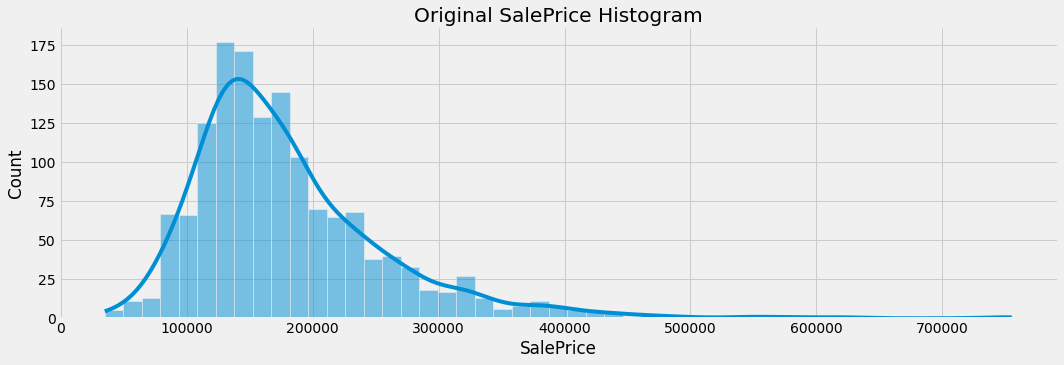

In [ ]:
sns.displot(train['SalePrice'], kde=True, aspect=3, height=5);
plt.title('Original SalePrice Histogram');

In [ ]:
# logarithmic scaling on saleprice
original_saleprice = train['SalePrice']
train['SalePrice'] = np.log1p(train['SalePrice'])

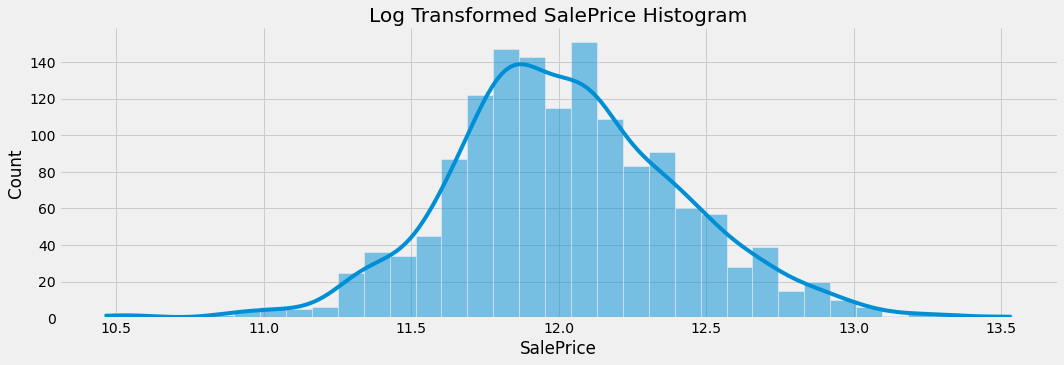

In [ ]:
sns.displot(train['SalePrice'], kde=True, aspect=3, height=5);
plt.title('Log Transformed SalePrice Histogram');

## Encoding Categorical Features

Machine learning really only works with numerical values. With that being said, categorical columns need to be changed to numbers. A way to do that is creating dummy variables for each column. 



In [ ]:
def create_dummies(df, dummy_cols):
  dummy_df = pd.get_dummies(df[dummy_cols], drop_first= True)
  df = pd.concat([df, dummy_df], axis=1)
  df = df.drop(dummy_cols, axis=1)
  
  return df


dummy_cols = train.select_dtypes(['object', 'category']).columns
train = create_dummies(train, dummy_cols)
test = create_dummies(test, dummy_cols)

## Selecting The Top Features

Going to use correlation analysis to figure out which features to feed the model. 

We want to feed the model features who have a significant relationship with our target variable (SalePrice). 

In [ ]:
# out_list = []

# for col in train.columns.drop(['SalePrice', 'Id']):
#   corr_tuple = pearsonr(train[col], train['SalePrice'])
#   out_list.append([col, corr_tuple[0], corr_tuple[1]])

In [ ]:
# corr_df = pd.DataFrame(out_list, columns=['Features', 'Correlation', 'P-Value'])

In [ ]:
# corr_df.sort_values(by='P-Value', inplace=True)
# corr_df.reset_index(inplace=True, drop=True)

In [ ]:
# corr_df

Above we have the correlation and p-value with respect to `SalePrice`. 

We sorted it by p-value, as this indicates how significant the relationship is to the target variable. A very low p-value (preferably lower than 0.05) indicates a low probability of achieving this result by random chance.

Please see below a diagram that show what the different correlation coefficients mean: 

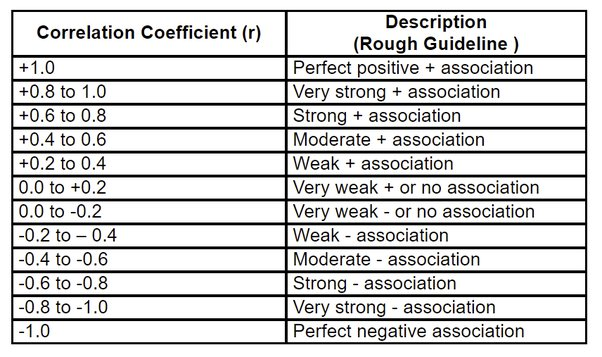

Going to keep the top 55 features as all of these have our desired p-value and they have at least a correlation of 0.20. 

In [ ]:
# features_to_keep = list(corr_df.iloc[:56, 0])

# # add id and saleprice to features to keep
# features_to_keep.append('Id')
# features_to_keep.append('SalePrice')

In [ ]:
# train = train[features_to_keep]

In [ ]:
# remove Saleprice since test doesn't have it
# features_to_keep.remove('SalePrice')

In [ ]:
# test = test[features_to_keep]

## Rescale the Data

Most machine learning models work best when all values are within the same domain. That domain is usually (0,1). Therefore, let's rescale all the numeric features. 

To rescale we can use a module from the sklearn library

In [ ]:
from sklearn.preprocessing import minmax_scale

def rescale(df, columns):
  for col in columns:
    df[col + '_scaled'] = minmax_scale(df[col])
  
  df = df.drop(columns, axis=1)
  return df

train = rescale(train, train.columns.drop(['Id', 'SalePrice']))
test = rescale(test, test.columns.drop(['Id']))

<ipython-input-214-0b9882b76e9f>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + '_scaled'] = minmax_scale(df[col])
<ipython-input-214-0b9882b76e9f>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + '_scaled'] = minmax_scale(df[col])
<ipython-input-214-0b9882b76e9f>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented fra

In [ ]:
train.head()

,Id,SalePrice,MSSubClass_scaled,LotFrontage_scaled,LotArea_scaled,OverallQual_scaled,YearBuilt_scaled,MasVnrArea_scaled,BsmtFinSF1_scaled,BsmtFinSF2_scaled,BsmtUnfSF_scaled,1stFlrSF_scaled,2ndFlrSF_scaled,LowQualFinSF_scaled,GrLivArea_scaled,BsmtFullBath_scaled,BsmtHalfBath_scaled,FullBath_scaled,HalfBath_scaled,BedroomAbvGr_scaled,KitchenAbvGr_scaled,Fireplaces_scaled,GarageCars_scaled,WoodDeckSF_scaled,OpenPorchSF_scaled,EnclosedPorch_scaled,3SsnPorch_scaled,ScreenPorch_scaled,PoolArea_scaled,MiscVal_scaled,YrSold_scaled,Fence_is_missing_scaled,MoreThanOneExterior_scaled,QualAndCondition_scaled,Cluster_scaled,MSZoning_FV_scaled,MSZoning_RH_scaled,MSZoning_RL_scaled,MSZoning_RM_scaled,LotShape_IR2_scaled,LotShape_IR3_scaled,LotShape_Reg_scaled,LandContour_HLS_scaled,LandContour_Low_scaled,LandContour_Lvl_scaled,LotConfig_CulDSac_scaled,LotConfig_FR2_scaled,LotConfig_FR3_scaled,LotConfig_Inside_scaled,LandSlope_Mod_scaled,LandSlope_Sev_scaled,Neighborhood_Blueste_scaled,Neighborhood_BrDale_scaled,Neighborhood_BrkSide_scaled,Neighborhood_ClearCr_scaled,Neighborhood_CollgCr_scaled,Neighborhood_Crawfor_scaled,Neighborhood_Edwards_scaled,Neighborhood_Gilbert_scaled,Neighborhood_IDOTRR_scaled,Neighborhood_MeadowV_scaled,Neighborhood_Mitchel_scaled,Neighborhood_NAmes_scaled,Neighborhood_NPkVill_scaled,Neighborhood_NWAmes_scaled,Neighborhood_NoRidge_scaled,Neighborhood_NridgHt_scaled,Neighborhood_OldTown_scaled,Neighborhood_SWISU_scaled,Neighborhood_Sawyer_scaled,Neighborhood_SawyerW_scaled,Neighborhood_Somerst_scaled,Neighborhood_StoneBr_scaled,Neighborhood_Timber_scaled,Neighborhood_Veenker_scaled,Condition1_Feedr_scaled,Condition1_Norm_scaled,Condition1_PosA_scaled,Condition1_PosN_scaled,Condition1_RRAe_scaled,Condition1_RRAn_scaled,Condition1_RRNe_scaled,Condition1_RRNn_scaled,BldgType_2fmCon_scaled,BldgType_Duplex_scaled,BldgType_Twnhs_scaled,BldgType_TwnhsE_scaled,HouseStyle_1.5Unf_scaled,HouseStyle_1Story_scaled,HouseStyle_2.5Fin_scaled,HouseStyle_2.5Unf_scaled,HouseStyle_2Story_scaled,HouseStyle_SFoyer_scaled,HouseStyle_SLvl_scaled,RoofStyle_Gable_scaled,RoofStyle_Gambrel_scaled,RoofStyle_Hip_scaled,RoofStyle_Mansard_scaled,RoofStyle_Shed_scaled,Exterior1st_AsphShn_scaled,Exterior1st_BrkComm_scaled,Exterior1st_BrkFace_scaled,Exterior1st_CBlock_scaled,Exterior1st_CemntBd_scaled,Exterior1st_HdBoard_scaled,Exterior1st_ImStucc_scaled,Exterior1st_MetalSd_scaled,Exterior1st_Plywood_scaled,Exterior1st_Stone_scaled,Exterior1st_Stucco_scaled,Exterior1st_VinylSd_scaled,Exterior1st_Wd Sdng_scaled,Exterior1st_WdShing_scaled,MasVnrType_BrkFace_scaled,MasVnrType_None_scaled,MasVnrType_Stone_scaled,ExterQual_Fa_scaled,ExterQual_Gd_scaled,ExterQual_TA_scaled,ExterCond_Fa_scaled,ExterCond_Gd_scaled,ExterCond_Po_scaled,ExterCond_TA_scaled,Foundation_CBlock_scaled,Foundation_PConc_scaled,Foundation_Slab_scaled,Foundation_Stone_scaled,Foundation_Wood_scaled,BsmtQual_Fa_scaled,BsmtQual_Gd_scaled,BsmtQual_TA_scaled,BsmtCond_Gd_scaled,BsmtCond_Po_scaled,BsmtCond_TA_scaled,BsmtExposure_Gd_scaled,BsmtExposure_Mn_scaled,BsmtExposure_No_scaled,BsmtFinType1_BLQ_scaled,BsmtFinType1_GLQ_scaled,BsmtFinType1_LwQ_scaled,BsmtFinType1_Rec_scaled,BsmtFinType1_Unf_scaled,BsmtFinType2_BLQ_scaled,BsmtFinType2_GLQ_scaled,BsmtFinType2_LwQ_scaled,BsmtFinType2_Rec_scaled,BsmtFinType2_Unf_scaled,HeatingQC_Fa_scaled,HeatingQC_Gd_scaled,HeatingQC_Po_scaled,HeatingQC_TA_scaled,CentralAir_Y_scaled,Electrical_FuseF_scaled,Electrical_FuseP_scaled,Electrical_Mix_scaled,Electrical_SBrkr_scaled,KitchenQual_Fa_scaled,KitchenQual_Gd_scaled,KitchenQual_TA_scaled,Functional_Maj2_scaled,Functional_Min1_scaled,Functional_Min2_scaled,Functional_Mod_scaled,Functional_Sev_scaled,Functional_Typ_scaled,GarageType_Attchd_scaled,GarageType_Basment_scaled,GarageType_BuiltIn_scaled,GarageType_CarPort_scaled,GarageType_Detchd_scaled,GarageFinish_RFn_scaled,GarageFinish_Unf_scaled,PavedDrive_P_scaled,PavedDrive_Y_scaled,SaleType_CWD_scaled,SaleType_Con_scaled,SaleType_ConLD_scaled,SaleType_ConL

# Choosing Best Features

Recursive Feature Elimination Cross Validation (RFECV) is a function from Sklearn.feature_selection that recursively deletes features while at each iteration running a model and evaluating it performance. The result is the optimal features. 

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
def best_features(df, model):

  predictors = df.columns.drop(['SalePrice', 'Id'])
  X_train = df[predictors]
  y_train = df['SalePrice']

  # RFECV
  selector = RFECV(estimator=model, step=1, cv=5, scoring='neg_root_mean_squared_error', min_features_to_select=25)
  selector = selector.fit(X_train, y_train)

  # best number of features, best features, scores, best_score
  optimal_num_features = selector.n_features_
  optimal_features = list(predictors[selector.support_])
  scores = (abs(selector.cv_results_['mean_test_score']))
  best_score = min(scores).round(4)

  return optimal_num_features, optimal_features, scores, best_score

## Linear Regression

In [ ]:
# lr_optimal_num_features, lr_optimal_features, scores, best_score = best_features(train, LinearRegression())

In [ ]:
# results from the run on 1/10/2022
lr_optimal_num_features = 30
lr_optimal_features = ['MSSubClass_scaled', 'LotFrontage_scaled', 'LotArea_scaled', 'OverallQual_scaled', 'OverallCond_scaled',
                       'YearBuilt_scaled', '2ndFlrSF_scaled', 'GrLivArea_scaled', 'BsmtFullBath_scaled', 'KitchenAbvGr_scaled',
                       'GarageCars_scaled', 'WoodDeckSF_scaled', 'EnclosedPorch_scaled', 'ScreenPorch_scaled', 'PoolArea_scaled',
                       'MSZoning_FV_scaled', 'MSZoning_RH_scaled', 'MSZoning_RL_scaled', 'MSZoning_RM_scaled', 'LotShape_IR3_scaled',
                       'Neighborhood_Crawfor_scaled', 'Neighborhood_NridgHt_scaled', 'Neighborhood_StoneBr_scaled', 
                       'BldgType_2fmCon_scaled', 'Exterior1st_BrkComm_scaled', 'Foundation_Slab_scaled', 'HeatingQC_Po_scaled',
                       'Functional_Maj2_scaled', 'Functional_Sev_scaled', 'SaleType_Con_scaled']

best_score = 0.1825

In [ ]:
print('Optimal Number of Features: {}'.format(lr_optimal_num_features))
print('Best Score: {}'.format(best_score))
print('Optimal Features: {}'.format(lr_optimal_features))

Optimal Number of Features: 30
Best Score: 0.1825
Optimal Features: ['MSSubClass_scaled', 'LotFrontage_scaled', 'LotArea_scaled', 'OverallQual_scaled', 'OverallCond_scaled', 'YearBuilt_scaled', '2ndFlrSF_scaled', 'GrLivArea_scaled', 'BsmtFullBath_scaled', 'KitchenAbvGr_scaled', 'GarageCars_scaled', 'WoodDeckSF_scaled', 'EnclosedPorch_scaled', 'ScreenPorch_scaled', 'PoolArea_scaled', 'MSZoning_FV_scaled', 'MSZoning_RH_scaled', 'MSZoning_RL_scaled', 'MSZoning_RM_scaled', 'LotShape_IR3_scaled', 'Neighborhood_Crawfor_scaled', 'Neighborhood_NridgHt_scaled', 'Neighborhood_StoneBr_scaled', 'BldgType_2fmCon_scaled', 'Exterior1st_BrkComm_scaled', 'Foundation_Slab_scaled', 'HeatingQC_Po_scaled', 'Functional_Maj2_scaled', 'Functional_Sev_scaled', 'SaleType_Con_scaled']


NameError: ignored

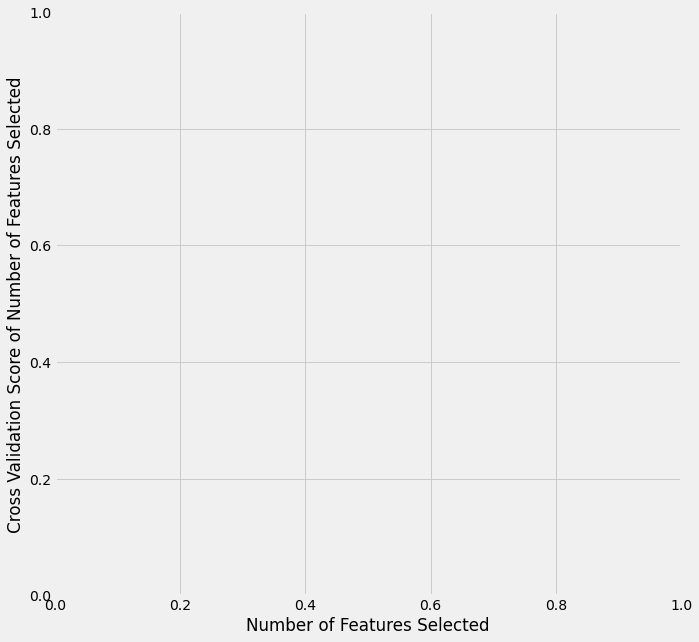

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score of Number of Features Selected')
plt.plot(range(1, len(scores) + 1), scores);

In [ ]:
data = {'Model' : ['LinearRegression'], 
        'RMSE' : [best_score], 
        'Number of Features' : lr_optimal_num_features,
        'Model Parameters' : 'Default', 
        'Kaggle Submission Score' : np.nan,
        'Kaggle Submission Ranking' : np.nan}

model_performance = pd.DataFrame(data)
model_performance

,Model,RMSE,Number of Features,Model Parameters,Kaggle Submission Score,Kaggle Submission Ranking
0,LinearRegression,0.1825,30,Default,NaN,NaN


## Ridge Regression

Ridge regression is very very similar to LinearRegression. For example these are the mathematical cost functions for each:

- **Linear Regression:** Min(Sum of Squared Errors)
- **Ridge Regression:** Min(Sum of Squared Errors) + (Alpha * Slope^2)

The advantages of using Ridge regression is really that due to the penalty term (alpha * slope^2) it's more effective against overfitting than linear regression. The reason we care about overfitting is because overfitting will give us amazing results in training but terrible results for the test set. We want a model that generalizes the relationships so that it performs well in training and testing. Ridge typically helps with this. 

In [ ]:
# ridge_optimal_num_features, ridge_optimal_features, scores, best_score = best_features(train, Ridge())

In [ ]:
# results from the run on 1/10/2022
ridge_optimal_num_features = 82
ridge_optimal_features = ['MSSubClass_scaled', 'LotFrontage_scaled', 'LotArea_scaled', 'OverallQual_scaled', 'OverallCond_scaled', 
                          'YearBuilt_scaled', 'BsmtFinSF1_scaled', 'BsmtFinSF2_scaled', 'BsmtUnfSF_scaled', '1stFlrSF_scaled', 
                          '2ndFlrSF_scaled', 'LowQualFinSF_scaled', 'GrLivArea_scaled', 'BsmtFullBath_scaled', 'FullBath_scaled',
                          'HalfBath_scaled', 'BedroomAbvGr_scaled', 'KitchenAbvGr_scaled', 'Fireplaces_scaled', 'GarageCars_scaled',
                          'WoodDeckSF_scaled', 'EnclosedPorch_scaled', '3SsnPorch_scaled', 'ScreenPorch_scaled', 'PoolArea_scaled',
                          'MSZoning_FV_scaled', 'MSZoning_RH_scaled', 'MSZoning_RL_scaled', 'MSZoning_RM_scaled', 
                          'LotShape_IR3_scaled', 'LandContour_HLS_scaled', 'LandContour_Low_scaled', 'LandContour_Lvl_scaled',
                          'LotConfig_CulDSac_scaled', 'LotConfig_FR3_scaled', 'Neighborhood_Blueste_scaled', 
                          'Neighborhood_BrDale_scaled', 'Neighborhood_ClearCr_scaled', 'Neighborhood_Crawfor_scaled', 
                          'Neighborhood_Edwards_scaled', 'Neighborhood_IDOTRR_scaled', 'Neighborhood_MeadowV_scaled', 
                          'Neighborhood_NoRidge_scaled', 'Neighborhood_NridgHt_scaled', 'Neighborhood_OldTown_scaled', 
                          'Neighborhood_Somerst_scaled', 'Neighborhood_StoneBr_scaled', 'Neighborhood_Veenker_scaled', 
                          'Condition1_Norm_scaled', 'Condition1_RRAn_scaled', 'Condition1_RRNn_scaled', 'BldgType_2fmCon_scaled', 
                          'BldgType_Twnhs_scaled', 'HouseStyle_2.5Unf_scaled', 'Exterior1st_BrkComm_scaled', 
                          'Exterior1st_BrkFace_scaled', 'Exterior1st_Stone_scaled', 'ExterCond_Fa_scaled', 
                          'Foundation_Slab_scaled', 'Foundation_Stone_scaled', 'BsmtQual_Fa_scaled', 'BsmtQual_Gd_scaled',
                          'BsmtQual_TA_scaled', 'BsmtCond_Po_scaled', 'BsmtExposure_Gd_scaled', 'CentralAir_Y_scaled', 
                          'KitchenQual_Fa_scaled', 'KitchenQual_Gd_scaled', 'KitchenQual_TA_scaled', 'Functional_Maj2_scaled',
                          'Functional_Min1_scaled', 'Functional_Min2_scaled', 'Functional_Sev_scaled', 'Functional_Typ_scaled',
                          'SaleType_CWD_scaled', 'SaleType_Con_scaled', 'SaleType_ConLD_scaled', 'SaleType_New_scaled', 
                          'SaleType_Oth_scaled', 'SaleCondition_AdjLand_scaled', 'SaleCondition_Alloca_scaled', 
                          'SaleCondition_Normal_scaled']
best_score = 0.1699

In [ ]:
print('Optimal Number of Features: {}'.format(ridge_optimal_num_features))
print('Best Score: {}'.format(best_score))
print('Optimal Features: {}'.format(ridge_optimal_features))

Optimal Number of Features: 82
Best Score: 0.1699
Optimal Features: ['MSSubClass_scaled', 'LotFrontage_scaled', 'LotArea_scaled', 'OverallQual_scaled', 'OverallCond_scaled', 'YearBuilt_scaled', 'BsmtFinSF1_scaled', 'BsmtFinSF2_scaled', 'BsmtUnfSF_scaled', '1stFlrSF_scaled', '2ndFlrSF_scaled', 'LowQualFinSF_scaled', 'GrLivArea_scaled', 'BsmtFullBath_scaled', 'FullBath_scaled', 'HalfBath_scaled', 'BedroomAbvGr_scaled', 'KitchenAbvGr_scaled', 'Fireplaces_scaled', 'GarageCars_scaled', 'WoodDeckSF_scaled', 'EnclosedPorch_scaled', '3SsnPorch_scaled', 'ScreenPorch_scaled', 'PoolArea_scaled', 'MSZoning_FV_scaled', 'MSZoning_RH_scaled', 'MSZoning_RL_scaled', 'MSZoning_RM_scaled', 'LotShape_IR3_scaled', 'LandContour_HLS_scaled', 'LandContour_Low_scaled', 'LandContour_Lvl_scaled', 'LotConfig_CulDSac_scaled', 'LotConfig_FR3_scaled', 'Neighborhood_Blueste_scaled', 'Neighborhood_BrDale_scaled', 'Neighborhood_ClearCr_scaled', 'Neighborhood_Crawfor_scaled', 'Neighborhood_Edwards_scaled', 'Neighborhood

NameError: ignored

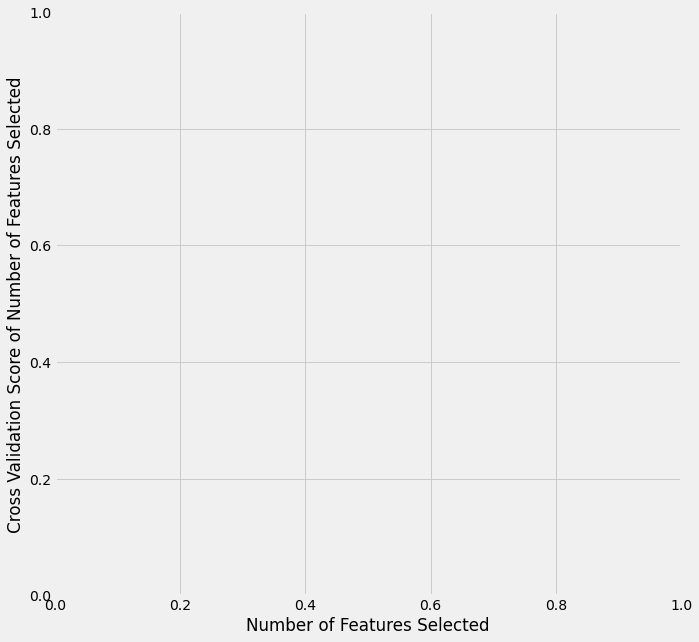

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score of Number of Features Selected')
plt.plot(range(1, len(scores) + 1), scores);

In [ ]:
model_performance.loc[len(model_performance)] = ['Ridge Regression', 
                                                 best_score,
                                                 ridge_optimal_num_features,
                                                 'Default',
                                                 np.nan,
                                                 np.nan]
model_performance

,Model,RMSE,Number of Features,Model Parameters,Kaggle Submission Score,Kaggle Submission Ranking
0,LinearRegression,0.1825,30,Default,NaN,NaN
1,Ridge Regression,0.1699,82,Default,NaN,NaN


## Random Forest

In [ ]:
# rf_optimal_num_features, rf_optimal_features, scores, best_score = best_features(train, RandomForestRegressor())

In [ ]:
# results from the run on 1/10/2022
rf_optimal_num_features = 69
rf_optimal_features = ['MSSubClass_scaled', 'LotFrontage_scaled', 'LotArea_scaled', 'OverallQual_scaled', 'OverallCond_scaled',
                       'YearBuilt_scaled', 'MasVnrArea_scaled', 'BsmtFinSF1_scaled', 'BsmtFinSF2_scaled', 'BsmtUnfSF_scaled', 
                       '1stFlrSF_scaled', '2ndFlrSF_scaled', 'GrLivArea_scaled', 'BsmtFullBath_scaled', 'FullBath_scaled',
                       'HalfBath_scaled', 'BedroomAbvGr_scaled', 'KitchenAbvGr_scaled', 'Fireplaces_scaled', 'GarageCars_scaled',
                       'WoodDeckSF_scaled', 'OpenPorchSF_scaled', 'EnclosedPorch_scaled', 'ScreenPorch_scaled', 'YrSold_scaled',
                       'Fence_is_missing_scaled', 'MoreThanOneExterior_scaled', 'MSZoning_RL_scaled', 'MSZoning_RM_scaled', 
                       'LotShape_Reg_scaled', 'LandContour_Lvl_scaled', 'LotConfig_Inside_scaled', 'Neighborhood_Crawfor_scaled',
                       'Neighborhood_Edwards_scaled', 'Neighborhood_IDOTRR_scaled', 'Condition1_Norm_scaled', 'RoofStyle_Hip_scaled',
                       'Exterior1st_BrkFace_scaled', 'Exterior1st_MetalSd_scaled', 'Exterior1st_VinylSd_scaled', 
                       'Exterior1st_Wd Sdng_scaled', 'ExterQual_Gd_scaled', 'ExterQual_TA_scaled', 'ExterCond_Fa_scaled', 
                       'ExterCond_TA_scaled', 'Foundation_CBlock_scaled', 'BsmtQual_Gd_scaled', 'BsmtQual_TA_scaled', 
                       'BsmtExposure_No_scaled', 'BsmtFinType1_GLQ_scaled', 'HeatingQC_Gd_scaled', 'HeatingQC_TA_scaled',
                       'CentralAir_Y_scaled', 'Electrical_SBrkr_scaled', 'KitchenQual_Gd_scaled', 'KitchenQual_TA_scaled', 
                       'Functional_Typ_scaled', 'GarageType_Attchd_scaled', 'GarageType_Detchd_scaled', 'GarageFinish_RFn_scaled',
                       'GarageFinish_Unf_scaled', 'PavedDrive_Y_scaled', 'SaleType_WD_scaled', 'SaleCondition_Family_scaled', 
                       'SaleCondition_Normal_scaled', 'YrsSinceRemodelBuckets_29+ Years_scaled', 'SeasonSold_Spring_scaled', 
                       'SeasonSold_Summer_scaled', 'SeasonSold_Fall_scaled']
best_score = 0.1561

In [ ]:
print('Optimal Number of Features: {}'.format(rf_optimal_num_features))
print('Best Score: {}'.format(best_score))
print('Optimal Features: {}'.format(rf_optimal_features))

Optimal Number of Features: 69
Best Score: 0.1561
Optimal Features: ['MSSubClass_scaled', 'LotFrontage_scaled', 'LotArea_scaled', 'OverallQual_scaled', 'OverallCond_scaled', 'YearBuilt_scaled', 'MasVnrArea_scaled', 'BsmtFinSF1_scaled', 'BsmtFinSF2_scaled', 'BsmtUnfSF_scaled', '1stFlrSF_scaled', '2ndFlrSF_scaled', 'GrLivArea_scaled', 'BsmtFullBath_scaled', 'FullBath_scaled', 'HalfBath_scaled', 'BedroomAbvGr_scaled', 'KitchenAbvGr_scaled', 'Fireplaces_scaled', 'GarageCars_scaled', 'WoodDeckSF_scaled', 'OpenPorchSF_scaled', 'EnclosedPorch_scaled', 'ScreenPorch_scaled', 'YrSold_scaled', 'Fence_is_missing_scaled', 'MoreThanOneExterior_scaled', 'MSZoning_RL_scaled', 'MSZoning_RM_scaled', 'LotShape_Reg_scaled', 'LandContour_Lvl_scaled', 'LotConfig_Inside_scaled', 'Neighborhood_Crawfor_scaled', 'Neighborhood_Edwards_scaled', 'Neighborhood_IDOTRR_scaled', 'Condition1_Norm_scaled', 'RoofStyle_Hip_scaled', 'Exterior1st_BrkFace_scaled', 'Exterior1st_MetalSd_scaled', 'Exterior1st_VinylSd_scaled', '

NameError: ignored

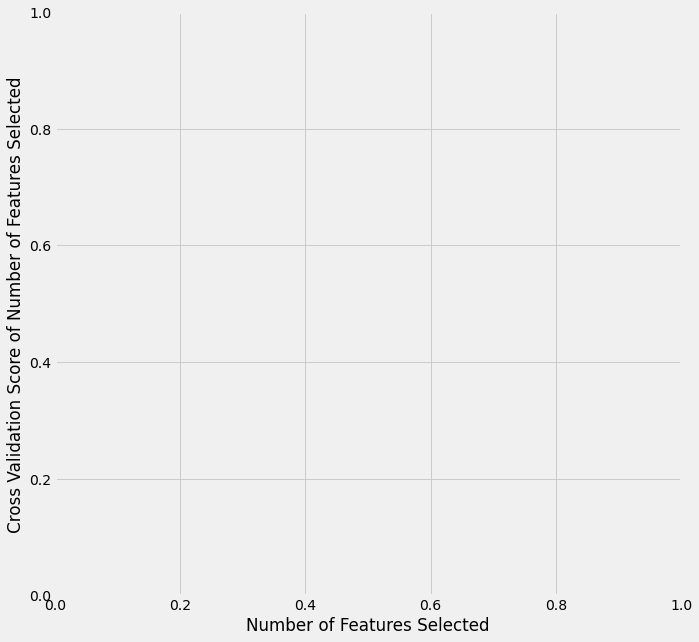

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score of Number of Features Selected')
plt.plot(range(1, len(scores) + 1), scores);

In [ ]:
model_performance.loc[len(model_performance)] = ['Random Forest', 
                                                 best_score,
                                                 rf_optimal_num_features,
                                                 'Default',
                                                 np.nan,
                                                 np.nan]
model_performance

,Model,RMSE,Number of Features,Model Parameters,Kaggle Submission Score,Kaggle Submission Ranking
0,LinearRegression,0.1825,30,Default,NaN,NaN
1,Ridge Regression,0.1699,82,Default,NaN,NaN
2,Random Forest,0.1561,69,Default,NaN,NaN


## Gradient Boosting

In [ ]:
# gb_optimal_num_features, gb_optimal_features, scores, best_score = best_features(train, GradientBoostingRegressor())

In [ ]:
# results from the run on 1/10/2022
gb_optimal_num_features = 68
gb_optimal_features = ['LotFrontage_scaled', 'LotArea_scaled', 'OverallQual_scaled', 'OverallCond_scaled', 
                       'YearBuilt_scaled', 'MasVnrArea_scaled', 'BsmtFinSF1_scaled', 'BsmtFinSF2_scaled', 
                       'BsmtUnfSF_scaled', '1stFlrSF_scaled', '2ndFlrSF_scaled', 'GrLivArea_scaled', 'BsmtFullBath_scaled', 
                       'FullBath_scaled', 'BedroomAbvGr_scaled', 'Fireplaces_scaled', 'GarageCars_scaled', 'WoodDeckSF_scaled',
                       'OpenPorchSF_scaled', 'EnclosedPorch_scaled', 'ScreenPorch_scaled', 'PoolArea_scaled', 'MiscVal_scaled',
                       'YrSold_scaled', 'MoreThanOneExterior_scaled', 'MSZoning_FV_scaled', 'MSZoning_RL_scaled', 'MSZoning_RM_scaled', 
                       'LotConfig_CulDSac_scaled', 'Neighborhood_BrkSide_scaled', 'Neighborhood_ClearCr_scaled', 'Neighborhood_Crawfor_scaled', 
                       'Neighborhood_Edwards_scaled', 'Neighborhood_IDOTRR_scaled', 'Neighborhood_NridgHt_scaled', 'Neighborhood_OldTown_scaled',
                       'Neighborhood_StoneBr_scaled', 'Condition1_Norm_scaled', 'Condition1_RRAe_scaled', 'HouseStyle_2Story_scaled',
                       'RoofStyle_Gambrel_scaled', 'Exterior1st_BrkComm_scaled', 'Exterior1st_BrkFace_scaled', 'Exterior1st_HdBoard_scaled', 
                       'ExterQual_TA_scaled', 'ExterCond_Fa_scaled', 'BsmtQual_Gd_scaled', 'BsmtQual_TA_scaled', 'BsmtCond_Gd_scaled', 
                       'BsmtCond_TA_scaled', 'BsmtExposure_Gd_scaled', 'BsmtExposure_No_scaled', 'BsmtFinType1_GLQ_scaled', 'CentralAir_Y_scaled', 
                       'KitchenQual_TA_scaled', 'Functional_Typ_scaled', 'GarageType_Basment_scaled', 'GarageType_CarPort_scaled',
                       'GarageType_Detchd_scaled', 'GarageFinish_RFn_scaled', 'GarageFinish_Unf_scaled', 'PavedDrive_Y_scaled', 
                       'SaleType_New_scaled', 'SaleCondition_Alloca_scaled', 'SaleCondition_Family_scaled', 'SaleCondition_Normal_scaled', 
                       'SaleCondition_Partial_scaled', 'YrsSinceRemodelBuckets_29+ Years_scaled']
best_score = 0.1408

In [ ]:
print('Optimal Number of Features: {}'.format(gb_optimal_num_features))
print('Best Score: {}'.format(best_score))
print('Optimal Features: {}'.format(gb_optimal_features))

Optimal Number of Features: 68
Best Score: 0.1408
Optimal Features: ['LotFrontage_scaled', 'LotArea_scaled', 'OverallQual_scaled', 'OverallCond_scaled', 'YearBuilt_scaled', 'MasVnrArea_scaled', 'BsmtFinSF1_scaled', 'BsmtFinSF2_scaled', 'BsmtUnfSF_scaled', '1stFlrSF_scaled', '2ndFlrSF_scaled', 'GrLivArea_scaled', 'BsmtFullBath_scaled', 'FullBath_scaled', 'BedroomAbvGr_scaled', 'Fireplaces_scaled', 'GarageCars_scaled', 'WoodDeckSF_scaled', 'OpenPorchSF_scaled', 'EnclosedPorch_scaled', 'ScreenPorch_scaled', 'PoolArea_scaled', 'MiscVal_scaled', 'YrSold_scaled', 'MoreThanOneExterior_scaled', 'MSZoning_FV_scaled', 'MSZoning_RL_scaled', 'MSZoning_RM_scaled', 'LotConfig_CulDSac_scaled', 'Neighborhood_BrkSide_scaled', 'Neighborhood_ClearCr_scaled', 'Neighborhood_Crawfor_scaled', 'Neighborhood_Edwards_scaled', 'Neighborhood_IDOTRR_scaled', 'Neighborhood_NridgHt_scaled', 'Neighborhood_OldTown_scaled', 'Neighborhood_StoneBr_scaled', 'Condition1_Norm_scaled', 'Condition1_RRAe_scaled', 'HouseStyle_2

NameError: ignored

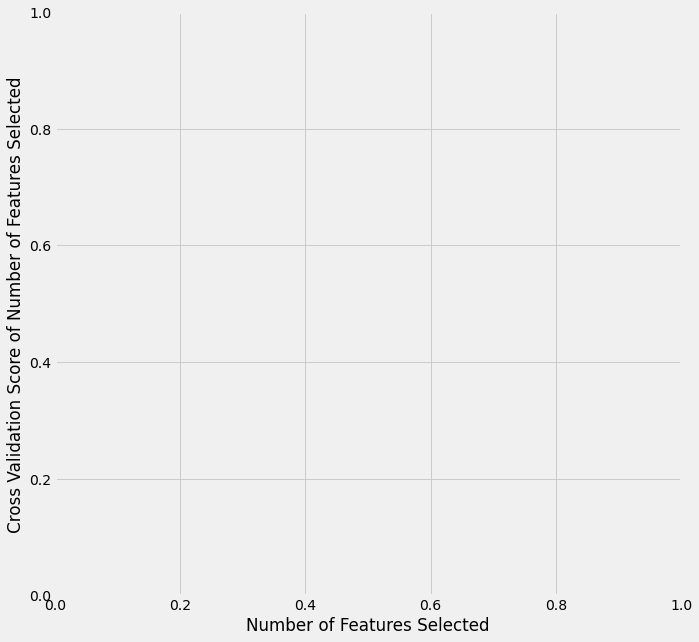

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score of Number of Features Selected')
plt.plot(range(1, len(scores) + 1), scores);

In [ ]:
model_performance.loc[len(model_performance)] = ['Gradient Boosting', 
                                                 best_score,
                                                 gb_optimal_num_features,
                                                 'Default',
                                                 np.nan,
                                                 np.nan]
model_performance

,Model,RMSE,Number of Features,Model Parameters,Kaggle Submission Score,Kaggle Submission Ranking
0,LinearRegression,0.1825,30,Default,NaN,NaN
1,Ridge Regression,0.1699,82,Default,NaN,NaN
2,Random Forest,0.1561,69,Default,NaN,NaN
3,Gradient Boosting,0.1408,68,Default,NaN,NaN


## eXtreme Gradient Boosting (XGBoost)

In [ ]:
# got to use the 'objective=reg:squarederror' to stop getting the errors I was getting
xgb_optimal_num_features, xgb_optimal_features, scores, best_score = best_features(train, XGBRegressor(objective='reg:squarederror'))

In [ ]:
xgb_optimal_num_features

53

In [ ]:
print(xgb_optimal_features)

['MSSubClass_scaled', 'LotFrontage_scaled', 'LotArea_scaled', 'OverallQual_scaled', 'YearBuilt_scaled', 'BsmtFinSF1_scaled', 'BsmtFinSF2_scaled', 'BsmtUnfSF_scaled', '1stFlrSF_scaled', '2ndFlrSF_scaled', 'GrLivArea_scaled', 'BsmtFullBath_scaled', 'HalfBath_scaled', 'KitchenAbvGr_scaled', 'Fireplaces_scaled', 'GarageCars_scaled', 'WoodDeckSF_scaled', 'OpenPorchSF_scaled', 'ScreenPorch_scaled', 'PoolArea_scaled', 'Fence_is_missing_scaled', 'QualAndCondition_scaled', 'MSZoning_RL_scaled', 'MSZoning_RM_scaled', 'LotConfig_CulDSac_scaled', 'Neighborhood_ClearCr_scaled', 'Neighborhood_Crawfor_scaled', 'Neighborhood_Edwards_scaled', 'Neighborhood_IDOTRR_scaled', 'Neighborhood_OldTown_scaled', 'Condition1_Norm_scaled', 'Condition1_PosA_scaled', 'Exterior1st_BrkComm_scaled', 'Exterior1st_BrkFace_scaled', 'ExterQual_TA_scaled', 'ExterCond_TA_scaled', 'BsmtQual_Gd_scaled', 'BsmtExposure_Gd_scaled', 'BsmtExposure_No_scaled', 'HeatingQC_Fa_scaled', 'CentralAir_Y_scaled', 'Electrical_SBrkr_scaled', 

In [ ]:
# results from the run on 1/10/2022
xgb_optimal_num_features = 53
xgb_optimal_features = ['MSSubClass_scaled', 'LotFrontage_scaled', 'LotArea_scaled', 'OverallQual_scaled', 'YearBuilt_scaled',
                        'BsmtFinSF1_scaled', 'BsmtFinSF2_scaled', 'BsmtUnfSF_scaled', '1stFlrSF_scaled', '2ndFlrSF_scaled', 
                        'GrLivArea_scaled', 'BsmtFullBath_scaled', 'HalfBath_scaled', 'KitchenAbvGr_scaled', 'Fireplaces_scaled',
                        'GarageCars_scaled', 'WoodDeckSF_scaled', 'OpenPorchSF_scaled', 'ScreenPorch_scaled', 'PoolArea_scaled', 
                        'Fence_is_missing_scaled', 'QualAndCondition_scaled', 'MSZoning_RL_scaled', 'MSZoning_RM_scaled', 
                        'LotConfig_CulDSac_scaled', 'Neighborhood_ClearCr_scaled', 'Neighborhood_Crawfor_scaled', 
                        'Neighborhood_Edwards_scaled', 'Neighborhood_IDOTRR_scaled', 'Neighborhood_OldTown_scaled', 
                        'Condition1_Norm_scaled', 'Condition1_PosA_scaled', 'Exterior1st_BrkComm_scaled', 
                        'Exterior1st_BrkFace_scaled', 'ExterQual_TA_scaled', 'ExterCond_TA_scaled', 'BsmtQual_Gd_scaled',
                        'BsmtExposure_Gd_scaled', 'BsmtExposure_No_scaled', 'HeatingQC_Fa_scaled', 'CentralAir_Y_scaled',
                        'Electrical_SBrkr_scaled', 'KitchenQual_TA_scaled', 'Functional_Sev_scaled', 'Functional_Typ_scaled', 
                        'GarageFinish_Unf_scaled', 'PavedDrive_Y_scaled', 'SaleType_New_scaled', 'SaleCondition_Alloca_scaled',
                        'SaleCondition_Family_scaled', 'SaleCondition_Normal_scaled', 'SaleCondition_Partial_scaled', 
                        'YrsSinceRemodelBuckets_29+ Years_scaled']

In [ ]:
print('Optimal Number of Features: {}'.format(xgb_optimal_num_features))
print('Best Score: {}'.format(best_score))
print('Optimal Features: {}'.format(xgb_optimal_features))

Optimal Number of Features: 53
Best Score: 0.147
Optimal Features: ['MSSubClass_scaled', 'LotFrontage_scaled', 'LotArea_scaled', 'OverallQual_scaled', 'YearBuilt_scaled', 'BsmtFinSF1_scaled', 'BsmtFinSF2_scaled', 'BsmtUnfSF_scaled', '1stFlrSF_scaled', '2ndFlrSF_scaled', 'GrLivArea_scaled', 'BsmtFullBath_scaled', 'HalfBath_scaled', 'KitchenAbvGr_scaled', 'Fireplaces_scaled', 'GarageCars_scaled', 'WoodDeckSF_scaled', 'OpenPorchSF_scaled', 'ScreenPorch_scaled', 'PoolArea_scaled', 'Fence_is_missing_scaled', 'QualAndCondition_scaled', 'MSZoning_RL_scaled', 'MSZoning_RM_scaled', 'LotConfig_CulDSac_scaled', 'Neighborhood_ClearCr_scaled', 'Neighborhood_Crawfor_scaled', 'Neighborhood_Edwards_scaled', 'Neighborhood_IDOTRR_scaled', 'Neighborhood_OldTown_scaled', 'Condition1_Norm_scaled', 'Condition1_PosA_scaled', 'Exterior1st_BrkComm_scaled', 'Exterior1st_BrkFace_scaled', 'ExterQual_TA_scaled', 'ExterCond_TA_scaled', 'BsmtQual_Gd_scaled', 'BsmtExposure_Gd_scaled', 'BsmtExposure_No_scaled', 'Heati

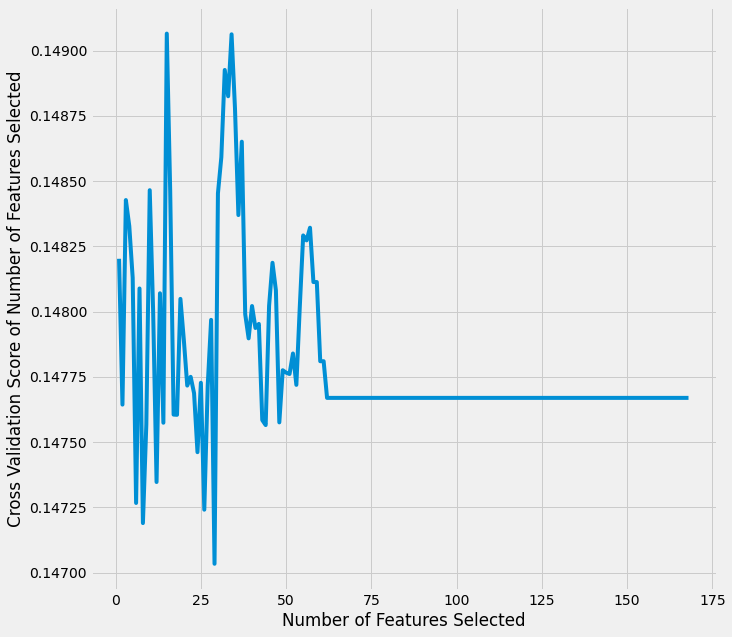

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score of Number of Features Selected')
plt.plot(range(1, len(scores) + 1), scores);

In [ ]:
model_performance.loc[len(model_performance)] = ['XG Boost', 
                                                 best_score,
                                                 xgb_optimal_num_features,
                                                 'Default',
                                                 np.nan,
                                                 np.nan]
model_performance

,Model,RMSE,Number of Features,Model Parameters,Kaggle Submission Score,Kaggle Submission Ranking
0,LinearRegression,0.1825,30,Default,NaN,NaN
1,Ridge Regression,0.1699,82,Default,NaN,NaN
2,Random Forest,0.1561,69,Default,NaN,NaN
3,Gradient Boosting,0.1408,68,Default,NaN,NaN
4,XG Boost,0.1470,53,Default,NaN,NaN


# Choosing The Best Model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def grid_search(df, predictors, model, hyperparameters):

  all_X = df[predictors]
  all_y = df['SalePrice']
  grid = GridSearchCV(model, param_grid=hyperparameters, cv=5, scoring='neg_root_mean_squared_error')
  grid.fit(all_X, all_y)

  best_params = grid.best_params_
  best_score = abs(grid.best_score_).round(4)

  return best_params, best_score

## Ridge Regression

In [ ]:
# hyperparameters = {'alpha' : arange(0, 1, 0.01)}

# best_params, best_score = grid_search(train, ridge_optimal_features, Ridge(), hyperparameters)

# print("Best Parameters: {}\n\nBest Score: {}".format(best_params, best_score))

In [ ]:
# results from the run on 1/10/2022
model_performance.loc[len(model_performance)] = ['RidgeRegression With Grid Search',
                                                 0.1627,
                                                 ridge_optimal_num_features,
                                                 {'alpha' : 0.99},
                                                 np.nan,
                                                 np.nan]

model_performance

,Model,RMSE,Number of Features,Model Parameters,Kaggle Submission Score,Kaggle Submission Ranking
0,LinearRegression,0.1825,30,Default,NaN,NaN
1,Ridge Regression,0.1699,82,Default,NaN,NaN
2,Random Forest,0.1561,69,Default,NaN,NaN
3,Gradient Boosting,0.1408,68,Default,NaN,NaN
4,XG Boost,0.1470,53,Default,NaN,NaN
5,RidgeRegression With Grid Search,0.1627,82,{'alpha': 0.99},NaN,NaN


## Random Forest

In [ ]:
# hyperparameters = {
#     'criterion': ['squared_error', 'friedman_mse'],
#     'max_depth': [5, 7, 9, 11],
#     'max_features': ['log2', 'sqrt'],
#     'min_samples_leaf': [3, 5, 7],
#     'min_samples_split': [3, 5, 7],
#     'n_estimators': [100, 500, 1000]}

# best_params, best_score = grid_search(train, rf_optimal_features, RandomForestRegressor(), hyperparameters)

# print("Best Parameters: {}\n\nBest Score: {}".format(best_params, best_score))

In [ ]:
# results from the run on 1/10/2022
model_performance.loc[len(model_performance)] = ['RandomForest With Grid Search', 
                                                 0.1592, 
                                                 rf_optimal_num_features,
                                                 {'criterion': 'squared_error',
                                                  'max_depth': 11, 
                                                  'max_features': 'sqrt',
                                                  'min_samples_leaf': 3,
                                                  'min_samples_split': 3,
                                                  'n_estimators': 1000},
                                                 np.nan,
                                                 np.nan]

model_performance

,Model,RMSE,Number of Features,Model Parameters,Kaggle Submission Score,Kaggle Submission Ranking
0,LinearRegression,0.1825,30,Default,NaN,NaN
1,Ridge Regression,0.1699,82,Default,NaN,NaN
2,Random Forest,0.1561,69,Default,NaN,NaN
3,Gradient Boosting,0.1408,68,Default,NaN,NaN
4,XG Boost,0.1470,53,Default,NaN,NaN
5,RidgeRegression With Grid Search,0.1627,82,{'alpha': 0.99},NaN,NaN
6,RandomForest With Grid Search,0.1592,69,"{'criterion': 'squared_error', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1000}",NaN,NaN


## Gradient Boosting

In [ ]:
# hyperparameters = {
#         'criterion' : ['friedman_mse', 'squared_error'],
#         'n_estimators' : [100, 500, 1000],
#         'max_features': ['log2', 'sqrt'],
#         'max_depth': [3, 4, 5, 6],
#         'min_samples_leaf': [3, 5, 7],
#         'min_samples_split': [3, 5, 7],
#         'learning_rate' : [0.10, 0.15, 0.20, 0.25, 0.30]}

# best_params, best_score = grid_search(train, gb_optimal_features, GradientBoostingRegressor(), hyperparameters)

# print("Best Parameters: {}\n\nBest Score: {}".format(best_params, best_score))

In [ ]:
# results from the run on 1/10/2022
model_performance.loc[len(model_performance)] = ['GradientBoosting With Grid Search', 
                                                 0.1325, 
                                                 gb_optimal_num_features,
                                                 {'criterion': 'friedman_mse', 
                                                  'max_depth': 3, 
                                                  'max_features': 'log2', 
                                                  'min_samples_leaf': 5,
                                                  'min_samples_split': 5, 
                                                  'n_estimators': 500, 
                                                  'learning_rate' : 0.10},
                                                 np.nan,
                                                 np.nan]

model_performance

,Model,RMSE,Number of Features,Model Parameters,Kaggle Submission Score,Kaggle Submission Ranking
0,LinearRegression,0.1825,30,Default,NaN,NaN
1,Ridge Regression,0.1699,82,Default,NaN,NaN
2,Random Forest,0.1561,69,Default,NaN,NaN
3,Gradient Boosting,0.1408,68,Default,NaN,NaN
4,XG Boost,0.1470,53,Default,NaN,NaN
5,RidgeRegression With Grid Search,0.1627,82,{'alpha': 0.99},NaN,NaN
6,RandomForest With Grid Search,0.1592,69,"{'criterion': 'squared_error', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1000}",NaN,NaN
7,GradientBoosting With Grid Search,0.1325,68,"{'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500, 'learning_rate': 0.1}",NaN,NaN


## eXtreme Gradient Boosting (XGBoost)

In [ ]:
hyperparameters = {'n_estimators' : [100, 500, 1000],
                   'max_depth' : [4, 6, 8, 10],
                   'learning_rate' : [0.01, 0.10, 0.20, 0.30, 0.40],
                   'colsample_bytree' : np.arange(0.50, 1, 0.10),
                   'subsample' : np.arange(0.50, 1, 0.10),
                   }

best_params, best_score = grid_search(train, xgb_optimal_features, XGBRegressor(objective='reg:squarederror'), hyperparameters)

print("Best Parameters: {}\n\nBest Score: {}".format(best_params, best_score))

Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}

Best Score: 0.1343


In [ ]:
# results from the run on 1/10/2022
model_performance.loc[len(model_performance)] = ['XGB With Grid Search', 
                                                 0.1369, 
                                                 xgb_optimal_num_features,
                                                 {'n_estimators' : 1000,
                                                  'max_depth' : 6,
                                                  'learning_rate' : 0.01,
                                                  'colsample_bytree' : 0.60,
                                                  'subsample' : 0.70},
                                                 np.nan,
                                                 np.nan]

model_performance

,Model,RMSE,Number of Features,Model Parameters,Kaggle Submission Score,Kaggle Submission Ranking
0,LinearRegression,0.1825,30,Default,NaN,NaN
1,Ridge Regression,0.1699,82,Default,NaN,NaN
2,Random Forest,0.1561,69,Default,NaN,NaN
3,Gradient Boosting,0.1408,68,Default,NaN,NaN
4,XG Boost,0.1446,36,Default,NaN,NaN
5,RidgeRegression With Grid Search,0.1627,82,{'alpha': 0.99},NaN,NaN
6,RandomForest With Grid Search,0.1592,69,"{'criterion': 'squared_error', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1000}",NaN,NaN
7,GradientBoosting With Grid Search,0.1325,68,"{'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500, 'learning_rate': 0.1}",NaN,NaN
8,XGB With Grid Search,0.1369,36,"{'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'subsample': 0.7}",NaN,NaN


# Kaggle Submission

In [ ]:
def kaggle_submission(model, predictors):
  df = test.copy()
  model.fit(train[predictors], original_saleprice)
  predictions = model.predict(test[predictors])
  df['SalePrice'] = predictions

  return df[['Id', 'SalePrice']]

In [ ]:
submission = kaggle_submission(RandomForestRegressor(criterion='squared_error',
                                                     max_depth=11,
                                                     max_features='sqrt',
                                                     min_samples_leaf=3,
                                                     min_samples_split=3,
                                                     n_estimators=1000), rf_optimal_features)

submission.to_csv('/content/gdrive/MyDrive/Learning ML/House Prices - Kaggle/kaggle_Submission.csv', index=False)

In [ ]:
# Adding kaggle submission performance for Linear Regression
model_performance.iloc[0, 4] = 0.6308
model_performance.iloc[0, 5] = '4142/4621'

# Adding kaggle submission performance for Ridge Regression
model_performance.iloc[1, 4] = 0.6662
model_performance.iloc[1, 5] = '4148/4621'

# Adding kaggle submission performance for RandomForestRegressor
model_performance.iloc[2, 4] = 0.1710
model_performance.iloc[2, 5] = '3064/4621'

# Adding kaggle submission performance for GradientBoostingRegressor
model_performance.iloc[3, 4] = 0.1721
model_performance.iloc[3, 5] = '3073/4621'

# Adding kaggle submission performance for XGB
model_performance.iloc[4, 4] = 0.1846
model_performance.iloc[4, 5] = '3225/4621'

# Adding kaggle submission performance for Ridge with grid search
model_performance.iloc[5, 4] = 0.6669
model_performance.iloc[5, 5] = '4150/4621'

# Adding kaggle submission performance for RandomForest with grid search
model_performance.iloc[6, 4] = 0.18077
model_performance.iloc[6, 5] = '3192/4621'

# Adding kaggle submission performance for GradientBoost with grid search
model_performance.iloc[7, 4] = 0.1593
model_performance.iloc[7, 5] = '2730/4621'

# Adding kaggle submission performance for XGB with grid search
model_performance.iloc[8, 4] = 0.1538
model_performance.iloc[8, 5] = '2544/4621'

In [ ]:
model_performance.sort_values(by='Kaggle Submission Score', ascending=True)

,Model,RMSE,Number of Features,Model Parameters,Kaggle Submission Score,Kaggle Submission Ranking
8,XGB With Grid Search,0.1369,36,"{'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'subsample': 0.7}",0.15380,2544/4621
7,GradientBoosting With Grid Search,0.1325,68,"{'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500, 'learning_rate': 0.1}",0.15930,2730/4621
2,Random Forest,0.1561,69,Default,0.17100,3064/4621
3,Gradient Boosting,0.1408,68,Default,0.17210,3073/4621
6,RandomForest With Grid Search,0.1592,69,"{'criterion': 'squared_error', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1000}",0.18077,3192/4621
4,XG Boost,0.1446,36,Default,0.18460,3225/4621
0,LinearRegression,0.1825,30,Default,0.63080,4142/4621
1,Ridge Regression,0.1699,82,Default,0.66620,4148/4621
5,RidgeRegression With Grid Search,0.1627,82,{'alpha': 0.99},0.66690,4150/4621
